# 可视化

色彩搭配可选网站
- [Flat UI Colors](https://flatuicolors.com/)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
# 设置色板
color_board = ["#bbded6", "#ffb6b9", "#fae3d9", "#8ac6d1"]
sns.set_palette(color_board)

## 双变量数据可视化

- id:
- VClass:汽车大小分类
- displ:发动机排量，单位是升
- comb:燃油里程,单位英里/加仑(mpg)

In [2]:
df_fuel_econ = pd.read_csv("data/fuel_econ.csv")
df_fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### 散点图

### 热图

### 小提琴图
小提琴图可以绘制一个数值变量和一个分类变量间的关系。

sns.violinplot，常用参数:
- inner=None，删除箱线图
- inner = "quartile",在小提琴区域绘制三条虚线分别表示三个四分位数

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

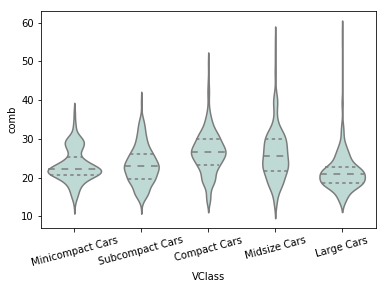

In [94]:
sns.violinplot(data=df_fuel_econ, x="VClass", y="comb",\
        order = ["Minicompact Cars", "Subcompact Cars", "Compact Cars", "Midsize Cars", "Large Cars"], \
        inner = "quartile", \
        color=sns.color_palette()[0])
plt.xticks(rotation = 15)

### 箱线图

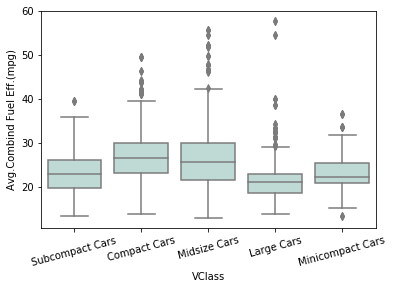

In [92]:
sns.boxplot(data=df_fuel_econ, x="VClass", y="comb",\
        color=sns.color_palette()[0])
plt.xticks(rotation = 15)
plt.ylabel("Avg.Combind Fuel Eff.(mpg)");

### 分组条形图

### 分面(Facet)
分面是处理不同变量级别分布或关系的一种方式，适合于处理包含两个或者多个变量的图表，分面操作将数据划分为不相交的子集，对每个子集，对其他变量绘制相应的图表。

[FactGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)常用参数：
- col_wrap，限制并排放置的分面数
- sharey=False，设置每个分面都有自己的Y轴范围。
- height,设置分面的高度,单位英尺
- col_order，分面排序

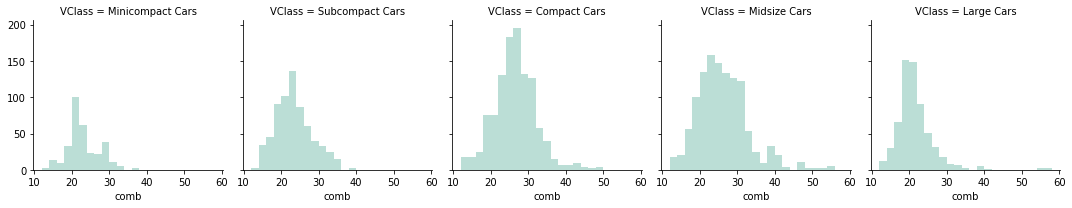

In [47]:
step = 2
bin_edges = np.arange(np.floor(df_fuel_econ["comb"].min()), df_fuel_econ["comb"].max() + step, step)
'''
创建分面图表，需要：
    1. 创建FactGrid对象实例
    2. 指定要分面的特征
'''
g = sns.FacetGrid(data=df_fuel_econ, col = "VClass", \
                  col_order=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars'])
'''
利用map方法，指定每个子集要绘制的图标类型和变量
'''
g.map(plt.hist, "comb", bins = bin_edges)

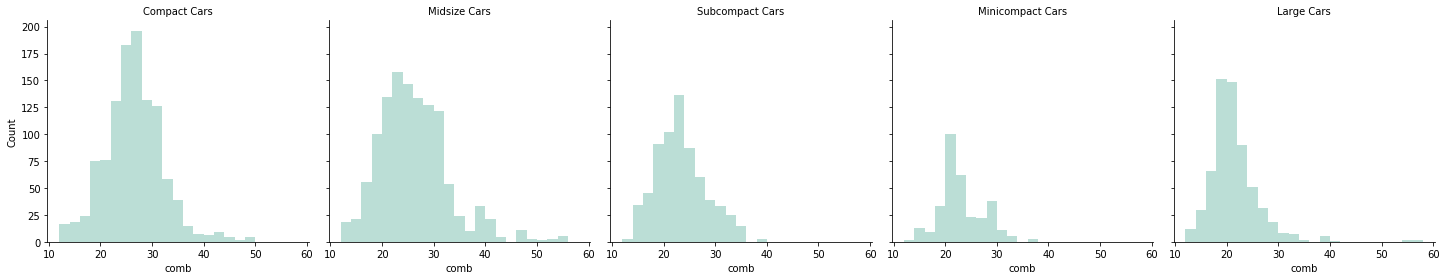

In [48]:
# 计算直方图bin的数量
step = 2
bin_edges = np.arange(np.floor(df_fuel_econ["comb"].min()), df_fuel_econ["comb"].max() + step, step)

# 计算分面排序
group_vclass_means = df_fuel_econ.groupby("VClass").mean()
group_vclass_order = group_vclass_means.sort_values(["comb"], ascending = False).index

g = sns.FacetGrid(data=df_fuel_econ, col="VClass", col_order=group_vclass_order, height=4)
g.map(plt.hist, "comb", bins = bin_edges)

# 将每个分面的标题设置为分类级别名称
g.set_titles("{col_name}")
g.set_ylabels("Count");

### 调整单变量图表
用单变量图表表示双变量关系


sns.barplot利用矩阵条的高度反映数值变量的集中趋势，其中常用参数：
- errwidth=0，删除误差线
- ci = "sd"，显示标准差

sns.pointplot将数据的均值绘制为点，其中常用参数：
- linestyles = ""，删除折线

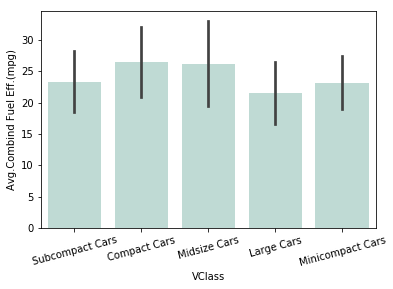

In [81]:
sns.barplot(data=df_fuel_econ, x = "VClass", y="comb", ci = "sd", \
           color=sns.color_palette()[0])
plt.xticks(rotation = 15)
plt.ylabel("Avg.Combind Fuel Eff.(mpg)");

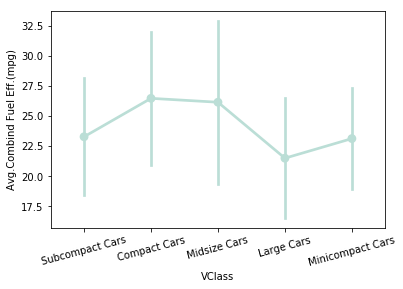

In [80]:
sns.pointplot(data=df_fuel_econ, x = "VClass", y="comb", ci = "sd",\
           color=sns.color_palette()[0])
plt.xticks(rotation = 15)
plt.ylabel("Avg.Combind Fuel Eff.(mpg)");

### 折线图
折线图用于描述一个数值变量相对于另外一个数据变量的数据趋势
- 对数据变化更加感兴趣
- 强调x轴上数据之间的联系，因此如果X轴是无序变量，使用折线图便没有意义。

特殊的数据展现：
- 时间序列图(X轴表示时间)，可使用专业化的sns.tsplot()


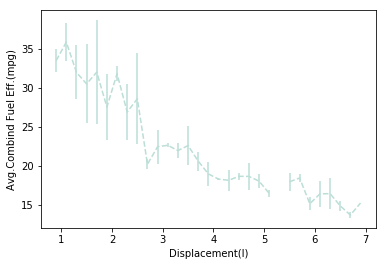

In [102]:
step = 0.2
bins_displ = np.arange(df_fuel_econ["displ"].min(), df_fuel_econ["displ"].max()+step, step)
bins_displ_x = bins_displ[:-1]+ 0.1
displ_binned = pd.cut(df_fuel_econ["displ"], bins_displ, include_lowest=False)
comb_mean = df_fuel_econ["comb"].groupby(displ_binned).mean()
comb_std = df_fuel_econ["comb"].groupby(displ_binned).std()

plt.errorbar(x = bins_displ_x, y = comb_mean, yerr=comb_std, \
            linestyle= "--")
plt.xlabel("Displacement(l)")
plt.ylabel("Avg.Combind Fuel Eff.(mpg)");

以pandas的rolling函数以移动窗口的形式计算概括统计值。

<ErrorbarContainer object of 3 artists>

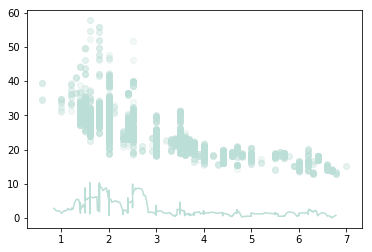

In [116]:
# 计算移动窗口的统计值
df_window = df_fuel_econ.sort_values("displ").rolling(15)
comb_mean = df_window["displ"].mean()
comb_std = df_window["comb"].std()

plt.scatter(data=df_fuel_econ, x = "displ", y = "comb", alpha=0.2)
plt.errorbar(x = comb_mean, y = comb_std)

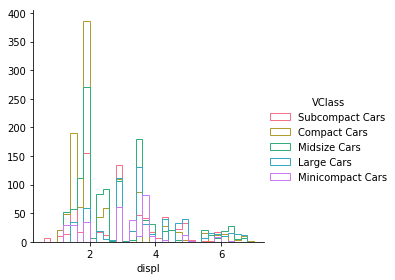

In [120]:
step = 0.2
bins_displ = np.arange(df_fuel_econ["displ"].min(), df_fuel_econ["displ"].max()+step, step)
g = sns.FacetGrid(data=df_fuel_econ, hue="VClass", height=4)
g.map(plt.hist, "displ", bins = bins_displ, histtype = "step")
g.add_legend();

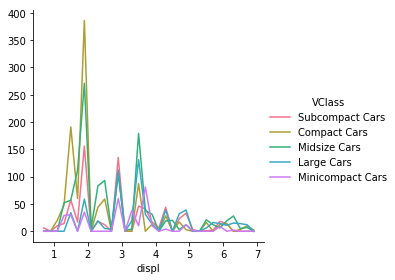

In [129]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bins[1:] + bins[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False, include_lowest = True)
    counts = x.groupby(data_bins).count()
    
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

    step = 0.2
bin_edges = np.arange(df_fuel_econ['displ'].min(), df_fuel_econ['displ'].max()+step, step)
g = sns.FacetGrid(data = df_fuel_econ, hue = 'VClass', height=4)
g.map(freq_poly, "displ", bins = bin_edges)
g.add_legend();